In [111]:
#importing necessary packages behorehand

#for mathematical and matrix operations
import numpy as np
import pandas as pd

#for data visualisation
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

#for pre-processing data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.datasets.samples_generator import make_regression
import pylab
from scipy import stats
import random

In [112]:
# importing the training dataset
train_df = pd.read_csv("train.csv")

#description of the dataset in terms of basic measures
train_df.describe()

,page_likes,page_checkin,daily_crowd,page_category,F1,F2,F3,F4,F5,F6,...,c2,c3,c4,c5,base_time,post_length,share_count,promotion,h_target,target
count,3.200000e+04,32000.000000,3.200000e+04,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,...,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000
mean,1.343977e+06,4624.117219,4.449958e+04,24.429094,476.289969,55.281313,35.067953,67.263243,0.082844,373.156219,...,21.251906,20.302469,52.241500,-0.382750,35.608469,163.910625,117.905812,0.000125,23.775375,6.895000
std,8.226959e+06,20357.127064,1.132647e+05,20.035223,531.880116,86.089457,68.648245,82.159901,2.309889,443.033955,...,73.146421,75.519400,127.761034,250.011403,20.920350,363.540402,796.980936,0.011180,1.844610,32.521676
min,1.000000e+01,0.000000,0.000000e+00,1.000000,-1400.000000,-5.803150,-211.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-41241.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,3.587900e+04,0.000000,6.980000e+02,9.000000,47.000000,5.419108,2.000000,7.898384,0.000000,40.000000,...,0.000000,0.000000,2.000000,-6.000000,18.000000,39.000000,2.000000,0.000000,24.000000,0.000000
50%,2.876980e+05,0.000000,6.531000e+03,18.000000,239.500000,22.453939,12.000000,32.545158,0.000000,179.000000,...,2.000000,0.000000,10.000000,0.000000,35.000000,98.000000,13.000000,0.000000,24.000000,0.000000
75%,1.204214e+06,99.000000,5.018500e+04,32.000000,780.000000,71.316946,39.000000,102.019618,0.000000,570.000000,...,11.000000,9.000000,43.000000,3.000000,53.000000,173.000000,59.000000,0.000000,24.000000,3.000000
max,4.869723e+08,186370.000000,3.959779e+06,106.000000,2430.000000,1920.750000,1936.500000,878.104426,222.000000,2131.000000,...,2131.000000,2000.000000,2131.000000,2131.000000,72.000000,20016.000000,77625.000000,1.000000,24.000000,1560.000000


In [113]:
#finding out the data types of all fields
train_df.dtypes

page_likes         int64
page_checkin       int64
daily_crowd        int64
page_category      int64
F1                 int64
F2               float64
F3               float64
F4               float64
F5                 int64
F6                 int64
F7               float64
F8               float64
c1                 int64
c2                 int64
c3                 int64
c4                 int64
c5                 int64
base_time          int64
post_length        int64
share_count        int64
promotion          int64
h_target           int64
post_day          object
basetime_day      object
target             int64
dtype: object

In [114]:
#importing the testing dataset
test_df = pd.read_csv("test.csv")

#description of the dataset in terms of basic measures
test_df.describe()

,page_likes,page_checkin,daily_crowd,page_category,F1,F2,F3,F4,F5,F6,...,c1,c2,c3,c4,c5,base_time,post_length,share_count,promotion,h_target
count,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.0,10000.000000
mean,1.194907e+06,4845.631500,4.476018e+04,24.303400,482.811700,55.549717,34.926950,67.969237,0.035000,378.72390,...,55.956500,21.373600,20.134900,52.806200,1.238700,35.31510,166.088200,104.727600,0.0,23.794600
std,2.668347e+06,20619.372002,9.640582e+04,19.882758,535.684229,82.908466,63.539536,82.263611,0.753944,446.88358,...,139.581085,76.065208,73.765542,131.154276,96.908853,21.12341,393.026363,377.333623,0.0,1.774239
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,-1423.000000,0.00000,0.000000,1.000000,0.0,1.000000
25%,3.400800e+04,0.000000,6.750000e+02,9.000000,47.000000,5.419108,2.000000,7.762714,0.000000,40.00000,...,2.000000,0.000000,0.000000,2.000000,-6.000000,17.00000,37.000000,2.000000,0.0,24.000000
50%,2.853200e+05,0.000000,7.141000e+03,18.000000,246.000000,23.729765,12.000000,33.125054,0.000000,185.00000,...,11.000000,2.000000,0.000000,10.000000,0.000000,35.00000,98.000000,13.000000,0.0,24.000000
75%,1.204214e+06,114.000000,5.266300e+04,32.000000,783.000000,71.751947,41.000000,103.316009,0.000000,570.00000,...,45.000000,12.000000,9.000000,43.000000,3.000000,54.00000,175.000000,61.000000,0.0,24.000000
max,3.762443e+07,186370.000000,1.298007e+06,106.000000,2430.000000,1237.426667,1237.000000,795.677629,29.000000,2131.00000,...,2040.000000,2040.000000,1479.000000,2040.000000,2040.000000,72.00000,21480.000000,8531.000000,0.0,24.000000


In [115]:
df = train_df
df.describe()

,page_likes,page_checkin,daily_crowd,page_category,F1,F2,F3,F4,F5,F6,...,c2,c3,c4,c5,base_time,post_length,share_count,promotion,h_target,target
count,3.200000e+04,32000.000000,3.200000e+04,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,...,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000
mean,1.343977e+06,4624.117219,4.449958e+04,24.429094,476.289969,55.281313,35.067953,67.263243,0.082844,373.156219,...,21.251906,20.302469,52.241500,-0.382750,35.608469,163.910625,117.905812,0.000125,23.775375,6.895000
std,8.226959e+06,20357.127064,1.132647e+05,20.035223,531.880116,86.089457,68.648245,82.159901,2.309889,443.033955,...,73.146421,75.519400,127.761034,250.011403,20.920350,363.540402,796.980936,0.011180,1.844610,32.521676
min,1.000000e+01,0.000000,0.000000e+00,1.000000,-1400.000000,-5.803150,-211.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-41241.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,3.587900e+04,0.000000,6.980000e+02,9.000000,47.000000,5.419108,2.000000,7.898384,0.000000,40.000000,...,0.000000,0.000000,2.000000,-6.000000,18.000000,39.000000,2.000000,0.000000,24.000000,0.000000
50%,2.876980e+05,0.000000,6.531000e+03,18.000000,239.500000,22.453939,12.000000,32.545158,0.000000,179.000000,...,2.000000,0.000000,10.000000,0.000000,35.000000,98.000000,13.000000,0.000000,24.000000,0.000000
75%,1.204214e+06,99.000000,5.018500e+04,32.000000,780.000000,71.316946,39.000000,102.019618,0.000000,570.000000,...,11.000000,9.000000,43.000000,3.000000,53.000000,173.000000,59.000000,0.000000,24.000000,3.000000
max,4.869723e+08,186370.000000,3.959779e+06,106.000000,2430.000000,1920.750000,1936.500000,878.104426,222.000000,2131.000000,...,2131.000000,2000.000000,2131.000000,2131.000000,72.000000,20016.000000,77625.000000,1.000000,24.000000,1560.000000


In [116]:
#to check if any values of any of the fields are null.

df.isnull().sum()

page_likes       0
page_checkin     0
daily_crowd      0
page_category    0
F1               0
F2               0
F3               0
F4               0
F5               0
F6               0
F7               0
F8               0
c1               0
c2               0
c3               0
c4               0
c5               0
base_time        0
post_length      0
share_count      0
promotion        0
h_target         0
post_day         0
basetime_day     0
target           0
dtype: int64

In [117]:
df.drop(['post_day', 'basetime_day' ], axis = 1)

#make dummy variables for them later and add these fields too.

,page_likes,page_checkin,daily_crowd,page_category,F1,F2,F3,F4,F5,F6,...,c2,c3,c4,c5,base_time,post_length,share_count,promotion,h_target,target
0,400487,0,57833,13,414,26.635492,15.0,44.941598,0,300,...,43,0,43,43,24,100,20,0,24,1
1,2667410,141,111855,18,793,185.317073,157.0,164.739179,0,419,...,8,37,216,-29,68,118,71,0,24,5
2,2411555,0,61797,9,560,103.860465,78.0,107.011971,0,325,...,0,0,0,0,0,119,207,0,24,23
3,1013,0,1,85,16,2.224299,1.0,3.489124,0,7,...,1,0,1,1,1,0,1,0,24,0
4,367390,0,2678,100,110,11.828175,6.0,15.430200,0,96,...,9,0,9,9,19,53,4,0,24,4
5,72615,0,3569,14,1263,28.346847,6.0,131.456263,0,558,...,0,2,9,-2,72,0,1,0,24,0
6,5200467,1,123640,9,751,195.910959,114.5,201.970224,0,529,...,16,24,37,-8,29,132,19,0,24,3
7,83215,393,12259,18,73,12.462687,10.0,10.864834,0,71,...,1,4,4,-3,39,256,1,0,24,30
8,362368,13,50264,24,418,111.451128,94.0,92.920248,0,355,...,2,20,142,-18,65,158,16,0,24,4
9,668834,4,42523,9,1389,109.848195,84.5,118.636482,0,1379,...,49,0,49,49,6,130,130,0,24,57


{'boxes': [<matplotlib.lines.Line2D at 0x1c28ff940b8>],
 'caps': [<matplotlib.lines.Line2D at 0x1c28ff91748>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c28ff91828>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1c28ff91940>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1c28ff94358>,
  <matplotlib.lines.Line2D at 0x1c28ff912b0>]}

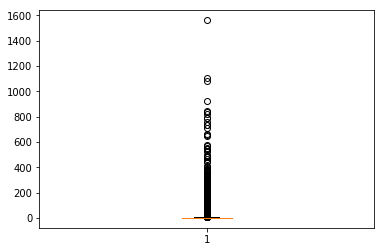

In [118]:
#making a boxplot for outlier detection
matplotlib.pyplot.boxplot(df.target)

In [125]:
#finding out the correlation between features
corr1 = df.corr()

In [127]:
corr1

,page_likes,page_checkin,daily_crowd,page_category,F1,F2,F3,F4,F5,F6,...,c2,c3,c4,c5,base_time,post_length,share_count,promotion,h_target,target
page_likes,1.000000,0.035598,0.686936,-0.024603,0.125860,0.133671,0.118342,0.136956,0.048776,0.131082,...,0.064998,0.058970,0.085439,0.002063,-0.003829,-0.003133,0.615160,-0.001593,-0.015856,0.049014
page_checkin,0.035598,1.000000,0.159186,-0.059331,0.158472,0.152979,0.122964,0.174317,-0.006638,0.192460,...,0.062093,0.070556,0.105533,-0.002688,0.000755,-0.002994,0.059108,0.001646,-0.021504,0.030149
daily_crowd,0.686936,0.159186,1.000000,-0.142532,0.473284,0.498307,0.437464,0.524278,0.140153,0.458482,...,0.235941,0.211403,0.308201,0.007580,-0.026701,-0.013395,0.452891,-0.003968,-0.094198,0.188054
page_category,-0.024603,-0.059331,-0.142532,1.000000,-0.321240,-0.234005,-0.194069,-0.291218,-0.024849,-0.312132,...,-0.106255,-0.095978,-0.149873,-0.006720,0.006448,0.040270,-0.033829,0.003946,0.010737,-0.069456
F1,0.125860,0.158472,0.473284,-0.321240,1.000000,0.714728,0.577836,0.896711,0.076244,0.969285,...,0.325554,0.295317,0.453893,0.009813,-0.007386,0.002035,0.148779,-0.002145,-0.055344,0.232288
F2,0.133671,0.152979,0.498307,-0.234005,0.714728,1.000000,0.962219,0.896669,0.357134,0.690790,...,0.440651,0.422706,0.616561,0.005086,-0.013356,-0.010361,0.176678,0.007424,-0.055052,0.337734
F3,0.118342,0.122964,0.437464,-0.194069,0.577836,0.962219,1.000000,0.763806,0.437009,0.556440,...,0.420920,0.402924,0.589627,0.004549,-0.011124,-0.019927,0.159433,-0.011657,-0.040022,0.324976
F4,0.136956,0.174317,0.524278,-0.291218,0.896711,0.896669,0.763806,1.000000,0.141325,0.863950,...,0.397874,0.386462,0.560447,0.005898,-0.013306,0.001041,0.175373,0.013798,-0.073640,0.300024
F5,0.048776,-0.006638,0.140153,-0.024849,0.076244,0.357134,0.437009,0.141325,1.000000,0.069140,...,0.205861,0.165587,0.221054,0.010402,-0.006841,-0.007811,0.048421,-0.000401,-0.030706,0.138836
F6,0.131082,0.192460,0.458482,-0.312132,0.969285,0.690790,0.556440,0.863950,0.069140,1.000000,...,0.316262,0.286617,0.440724,0.010431,-0.006980,0.001208,0.149737,-0.000187,-0.055671,0.219240


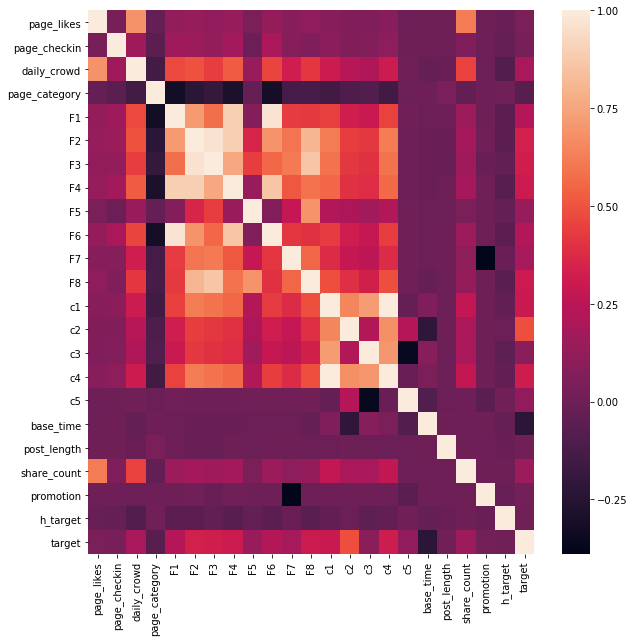

In [128]:
#plotting a heat map for easier detection of correlation amongst variables
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr())

In [129]:
### selecting top 20 attributes with respect to correlation
feature_list = corr1["target"].sort_values().tail(30).head(20) 
feature_list.index

Index(['base_time', 'page_category', 'post_length', 'h_target', 'promotion',
       'page_checkin', 'page_likes', 'c3', 'c5', 'F5', 'share_count', 'F7',
       'daily_crowd', 'F6', 'F1', 'c1', 'F4', 'F8', 'c4', 'F3'],
      dtype='object')

In [130]:
df[feature_list.index].corr()

,base_time,page_category,post_length,h_target,promotion,page_checkin,page_likes,c3,c5,F5,share_count,F7,daily_crowd,F6,F1,c1,F4,F8,c4,F3
base_time,1.000000,0.006448,-0.002140,-0.025164,-0.000325,0.000755,-0.003829,0.080190,-0.092787,-0.006841,0.004557,-0.006159,-0.026701,-0.006980,-0.007386,0.061087,-0.013306,-0.022879,0.045594,-0.011124
page_category,0.006448,1.000000,0.040270,0.010737,0.003946,-0.059331,-0.024603,-0.095978,-0.006720,-0.024849,-0.033829,-0.139049,-0.142532,-0.312132,-0.321240,-0.146885,-0.291218,-0.124455,-0.149873,-0.194069
post_length,-0.002140,0.040270,1.000000,-0.011318,0.004009,-0.002994,-0.003133,-0.006414,-0.006978,-0.007811,-0.001909,-0.003353,-0.013395,0.001208,0.002035,-0.006445,0.001041,-0.009246,-0.006612,-0.019927
h_target,-0.025164,0.010737,-0.011318,1.000000,-0.018338,-0.021504,-0.015856,-0.048415,0.011830,-0.030706,-0.001583,-0.013968,-0.094198,-0.055671,-0.055344,-0.032725,-0.073640,-0.061521,-0.031771,-0.040022
promotion,-0.000325,0.003946,0.004009,-0.018338,1.000000,0.001646,-0.001593,-0.000526,-0.062684,-0.000401,-0.001437,-0.389236,-0.003968,-0.000187,-0.002145,-0.002180,0.013798,-0.001914,-0.002362,-0.011657
page_checkin,0.000755,-0.059331,-0.002994,-0.021504,0.001646,1.000000,0.035598,0.070556,-0.002688,-0.006638,0.059108,0.082420,0.159186,0.192460,0.158472,0.102962,0.174317,0.057365,0.105533,0.122964
page_likes,-0.003829,-0.024603,-0.003133,-0.015856,-0.001593,0.035598,1.000000,0.058970,0.002063,0.048776,0.615160,0.085289,0.686936,0.131082,0.125860,0.085112,0.136956,0.112247,0.085439,0.118342
c3,0.080190,-0.095978,-0.006414,-0.048415,-0.000526,0.070556,0.058970,1.000000,-0.359300,0.165587,0.187461,0.257308,0.211403,0.286617,0.295317,0.720283,0.386462,0.329618,0.706547,0.402924
c5,-0.092787,-0.006720,-0.006978,0.011830,-0.062684,-0.002688,0.002063,-0.359300,1.000000,0.010402,0.002315,0.006939,0.007580,0.010431,0.009813,-0.025368,0.005898,0.017284,-0.012967,0.004549
F5,-0.006841,-0.024849,-0.007811,-0.030706,-0.000401,-0.006638,0.048776,0.165587,0.010402,1.000000,0.048421,0.279442,0.140153,0.069140,0.076244,0.222821,0.141325,0.694126,0.221054,0.437009


In [131]:
#number of instances for different count of comments
print(df['target'].value_counts())

0       17856
1        4060
2        2019
3        1244
4         887
5         604
6         499
7         425
8         312
9         287
10        260
11        234
12        190
13        170
14        158
15        133
17        116
16        109
19         95
18         93
21         91
20         88
23         72
22         62
26         61
25         59
27         58
29         55
28         54
24         49
        ...  
181         1
1108        1
836         1
756         1
484         1
388         1
324         1
374         1
646         1
1080        1
200         1
920         1
712         1
664         1
376         1
296         1
280         1
248         1
216         1
168         1
822         1
791         1
359         1
327         1
655         1
279         1
231         1
167         1
151         1
295         1
Name: target, Length: 305, dtype: int64


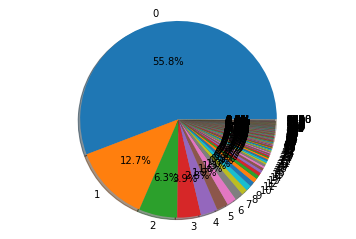

In [132]:
#Bar chart of independent variables with respect to output
labels = df['target'].astype('category').cat.categories.tolist()
counts = df['target'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()


In [133]:

X = df.drop(['post_day', 'basetime_day' ], axis = 1)
# deciding on the final features
Features_final = ['base_time', 'page_category', 'post_length', 'h_target', 'promotion',
       'page_checkin', 'page_likes', 'c3', 'c5', 'share_count',
       'daily_crowd', 'F1', 'c1','target']

df_final = df[Features_final]
df_final.describe()

,base_time,page_category,post_length,h_target,promotion,page_checkin,page_likes,c3,c5,share_count,daily_crowd,F1,c1,target
count,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,3.200000e+04,32000.000000,32000.000000,32000.000000,3.200000e+04,32000.000000,32000.000000,32000.000000
mean,35.608469,24.429094,163.910625,23.775375,0.000125,4624.117219,1.343977e+06,20.302469,-0.382750,117.905812,4.449958e+04,476.289969,55.419250,6.895000
std,20.920350,20.035223,363.540402,1.844610,0.011180,20357.127064,8.226959e+06,75.519400,250.011403,796.980936,1.132647e+05,531.880116,136.796735,32.521676
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000e+01,0.000000,-41241.000000,1.000000,0.000000e+00,-1400.000000,0.000000,0.000000
25%,18.000000,9.000000,39.000000,24.000000,0.000000,0.000000,3.587900e+04,0.000000,-6.000000,2.000000,6.980000e+02,47.000000,2.000000,0.000000
50%,35.000000,18.000000,98.000000,24.000000,0.000000,0.000000,2.876980e+05,0.000000,0.000000,13.000000,6.531000e+03,239.500000,11.000000,0.000000
75%,53.000000,32.000000,173.000000,24.000000,0.000000,99.000000,1.204214e+06,9.000000,3.000000,59.000000,5.018500e+04,780.000000,46.000000,3.000000
max,72.000000,106.000000,20016.000000,24.000000,1.000000,186370.000000,4.869723e+08,2000.000000,2131.000000,77625.000000,3.959779e+06,2430.000000,2281.000000,1560.000000


In [134]:
# outlier removal by gaussian score
df_final = df_final[(np.abs(stats.zscore(df_final)) < 3).all(axis=1)]

df_final.describe()

,base_time,page_category,post_length,h_target,promotion,page_checkin,page_likes,c3,c5,share_count,daily_crowd,F1,c1,target
count,27925.000000,27925.000000,27925.000000,27925.000000,27925.0,27925.000000,2.792500e+04,27925.000000,27925.000000,27925.000000,27925.000000,27925.000000,27925.000000,27925.000000
mean,35.794700,22.816294,137.566983,23.989400,0.0,2037.830725,9.341832e+05,11.564584,1.869257,63.298013,29249.375721,408.856007,34.634235,3.614038
std,20.960866,16.156201,164.751389,0.196012,0.0,7853.434516,1.857839e+06,29.921765,45.156629,174.518679,50008.039013,449.144516,63.152262,10.795464
min,0.000000,1.000000,0.000000,19.000000,0.0,0.000000,1.000000e+01,0.000000,-233.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,9.000000,35.000000,24.000000,0.0,0.000000,2.727900e+04,0.000000,-5.000000,2.000000,589.000000,45.000000,2.000000,0.000000
50%,36.000000,18.000000,96.000000,24.000000,0.0,0.000000,2.425260e+05,0.000000,0.000000,11.000000,4867.000000,211.000000,9.000000,0.000000
75%,54.000000,32.000000,171.000000,24.000000,0.0,60.000000,8.911590e+05,7.000000,2.000000,46.000000,36034.000000,664.000000,36.000000,2.000000
max,72.000000,83.000000,1247.000000,24.000000,0.0,53564.000000,1.830970e+07,246.000000,458.000000,2496.000000,380664.000000,2004.000000,465.000000,104.000000


In [135]:
df_final.head()

,base_time,page_category,post_length,h_target,promotion,page_checkin,page_likes,c3,c5,share_count,daily_crowd,F1,c1,target
0,24,13,100,24,0,0,400487,0,43,20,57833,414,43,1
1,68,18,118,24,0,141,2667410,37,-29,71,111855,793,248,5
2,0,9,119,24,0,0,2411555,0,0,207,61797,560,0,23
5,72,14,0,24,0,0,72615,2,-2,1,3569,1263,11,0
6,29,9,132,24,0,1,5200467,24,-8,19,123640,751,40,3


In [136]:
X = df_final.iloc[:,0:13]
Y = df_final["target"]
## Splitting data train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.1)

#applying feature scaling, specifically min-max scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#using training data's min and max for scaling the testing data
X_train.shape

c:\users\nikita\anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(25132, 13)

In [151]:
#simple gradient descent algorithm

def gradient_descent(alpha, x, y, numIterations):
    # number of samples
    m = x.shape[0] 
    theta = np.ones(14)
    x_transpose = x.transpose()
    for iter in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
         ## Cost Function J to be calculated
        J = np.sum(loss ** 2) / (2 * m) 
        print("iter %s | J: %.3f" % (iter, J)) 
        gradient = np.dot(x_transpose, loss) / m 
        ## Batch update
        theta = theta - alpha * gradient 
        print(theta)
    return theta

if __name__ == '__main__':

    x, y = X_train, Y_train 
    m, n = np.shape(x)
    x = np.c_[ np.ones(m), x] # insert column
    alpha = 0.30  # learning rate
    theta = gradient_descent(alpha, x, y, 3000)

iter 0 | J: 57.673
[0.96575731 0.63821275 0.92655744 0.98851542 0.964651   1.
 0.98949526 1.04778185 1.00038225 1.10054958 1.05465881 1.09236903
 1.16974272 1.14661416]
iter 1 | J: 56.986
[0.98550943 0.31252872 0.86958872 0.98303222 0.98324726 1.
 0.98068896 1.09722855 1.00269281 1.21858496 1.1100402  1.18670989
 1.34623961 1.29553517]
iter 2 | J: 56.355
[1.01763317e+00 1.33326928e-03 8.17885613e-01 9.78923593e-01
 1.01422583e+00 1.00000000e+00 9.71987372e-01 1.14619062e+00
 1.00493052e+00 1.33999594e+00 1.16508623e+00 1.27979089e+00
 1.52091650e+00 1.44358046e+00]
iter 3 | J: 55.752
[ 1.05190733 -0.30082376  0.76865802  0.97505442  1.04737994  1.
  0.96300893  1.19416073  1.00661672  1.46132959  1.21954721  1.37085819
  1.69174702  1.5899968 ]
iter 4 | J: 55.175
[ 1.08583798 -0.59541152  0.72118829  0.97114879  1.08021876  1.
  0.95367007  1.24103517  1.00764709  1.58175521  1.2733721   1.45976678
  1.85831419  1.73462807]
iter 5 | J: 54.622
[ 1.1188323  -0.88291646  0.67526954  0.967

[ 1.78280433 -9.12652682 -0.36982131  0.681567    1.75056585  1.
  0.19194174  2.61244192  0.45211358  6.59933021  3.3908949   3.98754469
  6.37262487  7.34543273]
iter 56 | J: 42.896
[ 1.78314085 -9.20970432 -0.37522958  0.67516561  1.750806    1.
  0.17462627  2.62633269  0.4337915   6.68203362  3.42362964  4.01122032
  6.41019881  7.43072777]
iter 57 | J: 42.814
[ 1.78316407 -9.29084266 -0.38029317  0.66876469  1.75074514  1.
  0.15730353  2.63991562  0.41530843  6.76431398  3.45612508  4.03427167
  6.44656171  7.51534939]
iter 58 | J: 42.733
[ 1.78288193 -9.36998957 -0.38502244  0.66236528  1.75039104  1.
  0.1399766   2.65319829  0.39666933  6.84617856  3.48838521  4.05671347
  6.48174321  7.59930881]
iter 59 | J: 42.655
[ 1.78230217 -9.44719165 -0.3894275   0.65596839  1.74975129  1.
  0.12264845  2.66618807  0.37787905  6.92763443  3.52041394  4.07856007
  6.5157722   7.68261699]
iter 60 | J: 42.578
[ 1.78143236 -9.52249441 -0.39351819  0.64957499  1.74883329  1.
  0.10532198  2

iter 115 | J: 39.991
[  1.4482237  -11.7138495   -0.33737555   0.32211024   1.42763122
   1.          -0.78943537   3.09032474  -0.80633537  10.99781171
   5.03389196   4.67313418   7.22738619  11.55996622]
iter 116 | J: 39.959
[  1.43907314 -11.73097821  -0.33377256   0.31680417   1.41891756
   1.          -0.80402743   3.09455136  -0.82843775  11.06380712
   5.05708565   4.67660156   7.22695545  11.6184378 ]
iter 117 | J: 39.927
[  1.42986438 -11.74761624  -0.33013691   0.31152516   1.41015223
   1.          -0.81854783   3.09871048  -0.85053911  11.12962036
   5.0801747    4.67991766   7.22626293  11.67661605]
iter 118 | J: 39.896
[  1.42059929 -11.76377514  -0.32647055   0.30627329   1.40133704
   1.          -0.83299633   3.10280381  -0.87263822  11.19525333
   5.1031602    4.68308595   7.22531556  11.73450412]
iter 119 | J: 39.865
[  1.41127967 -11.77946621  -0.32277538   0.30104863   1.39247376
   1.          -0.84737273   3.10683304  -0.89473387  11.26070791
   5.12604326   4.6

iter 188 | J: 38.146
[ 7.06210776e-01 -1.21744555e+01 -6.42849059e-02  5.59972652e-03
  7.32320717e-01  1.00000000e+00 -1.66587900e+00  3.29421611e+00
 -2.36391134e+00  1.54229528e+01  6.50338636e+00  4.67889080e+00
  6.80500749e+00  1.52038426e+01]
iter 189 | J: 38.126
[ 6.95748879e-01 -1.21744914e+01 -6.10210392e-02  2.20851333e-03
  7.22681113e-01  1.00000000e+00 -1.67535895e+00  3.29622117e+00
 -2.38394439e+00  1.54789380e+01  6.52091634e+00  4.67694161e+00
  6.79656227e+00  1.52465342e+01]
iter 190 | J: 38.106
[ 6.85291589e-01 -1.21744436e+01 -5.77780687e-02 -1.15948186e-03
  7.13050500e-01  1.00000000e+00 -1.68477670e+00  3.29821660e+00
 -2.40393310e+00  1.55348156e+01  6.53838725e+00  4.67496346e+00
  6.78809478e+00  1.52890627e+01]
iter 191 | J: 38.086
[ 6.74839187e-01 -1.21743144e+01 -5.45560738e-02 -4.50436986e-03
  7.03429140e-01  1.00000000e+00 -1.69413252e+00  3.30020267e+00
 -2.42387727e+00  1.55905861e+01  6.55579942e+00  4.67295697e+00
  6.77960619e+00  1.53314290e+01]


iter 254 | J: 37.003
[  0.03412739 -12.0653544    0.10642351  -0.17355186   0.12324649
   1.          -2.17177036   3.41408652  -3.58450728  18.90564873
   7.54630441   4.50884397   6.23695957  17.70809162]
iter 255 | J: 36.988
[  0.02431618 -12.06271858   0.10835475  -0.17565002   0.11451719
   1.          -2.177781     3.4157935   -3.60135142  18.95534831
   7.56049624   4.5058569    6.22858678  17.74163452]
iter 256 | J: 36.974
[ 1.45174610e-02 -1.20600690e+01  1.10268533e-01 -1.77732197e-01
  1.05803925e-01  1.00000000e+00 -2.18374865e+00  3.41749879e+00
 -3.61814538e+00  1.90049627e+01  7.57464447e+00  4.50286256e+00
  6.22022872e+00  1.77750589e+01]
iter 257 | J: 36.959
[ 4.73125578e-03 -1.20574060e+01  1.12164974e-01 -1.79798478e-01
  9.71067184e-02  1.00000000e+00 -2.18967357e+00  3.41920244e+00
 -3.63488916e+00  1.90544920e+01  7.58874929e+00  4.49986108e+00
  6.21188560e+00  1.78083654e+01]
iter 258 | J: 36.945
[-5.04241241e-03 -1.20547301e+01  1.14044182e-01 -1.81848967e-01


iter 325 | J: 36.113
[ -0.63113758 -11.86120111   0.20646669  -0.28805732  -0.45687695
   1.          -2.50565677   3.53229782  -4.65659431  22.23487619
   8.45422566   4.28483585   5.68591828  19.81989337]
iter 326 | J: 36.102
[ -0.64006045 -11.8582524    0.20742838  -0.28924269  -0.46448677
   1.          -2.50920425   3.53392823  -4.66992706  22.27904477
   8.46568432   4.28157487   5.67883971  19.84605792]
iter 327 | J: 36.092
[ -0.64897131 -11.85530482   0.20838     -0.29041805  -0.4720816
   1.          -2.51272455   3.53555775  -4.68321183  22.32314213
   8.47710903   4.27831231   5.67178063  19.87213147]
iter 328 | J: 36.081
[ -0.65787019 -11.85235844   0.20932165  -0.29158346  -0.47966147
   1.          -2.51621785   3.53718638  -4.69644868  22.36716845
   8.48849992   4.27504824   5.66474102  19.89811433]
iter 329 | J: 36.071
[ -0.66675711 -11.84941334   0.21025342  -0.292739    -0.4872264
   1.          -2.51968434   3.53881411  -4.70963766  22.41112389
   8.49985707   4.271

iter 392 | J: 35.496
[ -1.20358448 -11.66868175   0.25241029  -0.34831716  -0.93504706
   1.          -2.6911119    3.63941772  -5.44678632  25.04435852
   9.15185198   4.06447329   5.25377483  21.38556341]
iter 393 | J: 35.488
[ -1.21175713 -11.66591258   0.25286423  -0.34896457  -0.94172016
   1.          -2.69318928   3.64098109  -5.45704558  25.08410287
   9.16125938   4.06117597   5.24795059  21.40625408]
iter 394 | J: 35.480
[ -1.21991944 -11.66314696   0.25331274  -0.34960573  -0.94838033
   1.          -2.69524939   3.64254332  -5.46726133  25.1237862
   9.1706393    4.05787892   5.24214393  21.42687172]
iter 395 | J: 35.472
[ -1.22807144 -11.66038491   0.25375588  -0.35024068  -0.95502759
   1.          -2.69729237   3.64410441  -5.47743365  25.16340866
   9.1799918    4.05458214   5.23635482  21.44741656]
iter 396 | J: 35.464
[ -1.23621314 -11.65762644   0.25419369  -0.35086947  -0.96166199
   1.          -2.69931832   3.64566436  -5.4875626   25.20297037
   9.18931698   4.05

iter 463 | J: 35.006
[ -1.75953128 -11.4812406    0.273722    -0.38104431  -1.3783717
   1.          -2.80179474   3.74740647  -6.071368    27.72220377
   9.75596706   3.83194257   4.88160414  22.68544144]
iter 464 | J: 35.000
[ -1.76702918 -11.47873504   0.27389693  -0.38134403  -1.38419825
   1.          -2.80290119   3.74888145  -6.07872564  27.75794283
   9.76361445   3.82870236   4.87692585  22.70147085]
iter 465 | J: 34.994
[ -1.77451839 -11.47623319   0.27406919  -0.38164005  -1.39001384
   1.          -2.80399713   3.75035509  -6.08604517  27.79362997
   9.7712396    3.82546342   4.8722622   22.71744155]
iter 466 | J: 34.989
[ -1.78199893 -11.47373504   0.27423879  -0.38193239  -1.39581852
   1.          -2.80508262   3.7518274   -6.09332665  27.82926528
   9.77884259   3.82222576   4.86761315  22.73335371]
iter 467 | J: 34.983
[ -1.78947083 -11.4712406    0.27440576  -0.38222108  -1.40161231
   1.          -2.80615773   3.75329838  -6.10057017  27.86484891
   9.78642348   3.81

iter 532 | J: 34.645
[ -2.25756919 -11.31684402   0.28074571  -0.394346    -1.75600644
   1.          -2.8569484    3.84599495  -6.49360568  30.07230631
  10.23472725   3.61186424   4.59106215  23.66242901]
iter 533 | J: 34.640
[ -2.26451458 -11.31458421   0.28078852  -0.39444667  -1.76113419
   1.          -2.8574795    3.84737567  -6.49851093  30.10472449
  10.24098331   3.60873405   4.58730156  23.67478909]
iter 534 | J: 34.636
[ -2.27145261 -11.31232777   0.28083006  -0.39454518  -1.7662526
   1.          -2.8580042    3.84875501  -6.50338324  30.13709825
  10.24722119   3.60560576   4.58355295  23.68710125]
iter 535 | J: 34.631
[ -2.27838331 -11.31007471   0.28087032  -0.39464154  -1.7713617
   1.          -2.85852253   3.85013296  -6.50822268  30.1694277
  10.25344093   3.60247936   4.57981629  23.69936563]
iter 536 | J: 34.627
[ -2.2853067  -11.30782502   0.28090934  -0.39473578  -1.7764615
   1.          -2.85903454   3.85150953  -6.51302934  30.20171293
  10.25964259   3.59935

iter 601 | J: 34.363
[ -2.72044168 -11.16854635   0.28134021  -0.39703243  -2.08897511
   1.          -2.88075022   3.93803796  -6.75854508  32.21002173
  10.62633421   3.40065169   4.35788381  24.40974688]
iter 602 | J: 34.360
[ -2.72691887 -11.16650625   0.28132202  -0.39701894  -2.09350531
   1.          -2.88093367   3.93932421  -6.76134416  32.23959883
  10.63145004   3.39766657   4.35487032  24.41910334]
iter 603 | J: 34.356
[ -2.73338983 -11.16446912   0.28130327  -0.39700425  -2.09802751
   1.          -2.8811133    3.94060911  -6.76411512  32.26913791
  10.63655094   3.39468374   4.35186654  24.42842046]
iter 604 | J: 34.352
[ -2.73985456 -11.16243497   0.28128397  -0.39698835  -2.10254173
   1.          -2.88128913   3.94189266  -6.76685803  32.29863906
  10.64163696   3.39170322   4.34887245  24.43769836]
iter 605 | J: 34.349
[ -2.74631308 -11.16040379   0.28126412  -0.39697127  -2.10704797
   1.          -2.8814612    3.94317488  -6.76957295  32.32810237
  10.64670813   3.3

[ -3.14129171 -11.03817543   0.27918458  -0.39391425  -2.37561329
   1.          -2.88583947   4.02128976  -6.88701258  34.11158074
  10.9380263    3.20592464   4.17608049  24.95471604]
iter 669 | J: 34.141
[ -3.14738149 -11.03632246   0.27914201  -0.39384011  -2.37964414
   1.          -2.88582256   4.02248816  -6.88806941  34.13879044
  10.94222995   3.20310224   4.17365538  24.96166658]
iter 670 | J: 34.138
[ -3.15346594 -11.0344721    0.27909924  -0.39376534  -2.38366807
   1.          -2.88580341   4.02368529  -6.88910233  34.16596743
  10.94642125   3.20028238   4.17123815  24.96858451]
iter 671 | J: 34.136
[ -3.15954507 -11.03262434   0.27905627  -0.39368993  -2.38768509
   1.          -2.88578202   4.02488114  -6.8901114   34.19311178
  10.95060025   3.19746506   4.16882878  24.97546993]
iter 672 | J: 34.133
[ -3.16561888 -11.03077917   0.27901309  -0.39361389  -2.39169523
   1.          -2.88575842   4.02607573  -6.89109669  34.22022355
  10.95476696   3.1946503    4.16642725 

iter 714 | J: 34.018
[ -3.41607981 -10.95555516   0.27706487  -0.38993456  -2.55409299
   1.          -2.88299479   4.0751189   -6.91176277  35.33044309
  11.11912896   3.07876663   4.07232231  25.24202089]
iter 715 | J: 34.015
[ -3.42193638 -10.9538166    0.27701617  -0.38983713  -2.55782051
   1.          -2.88289175   4.0762601   -6.91177942  35.35622063
  11.12279928   3.07606383   4.0702354   25.24756109]
iter 716 | J: 34.012
[ -3.42778815 -10.95208041   0.2769674   -0.38973932  -2.56154175
   1.          -2.8827872    4.0774001   -6.91177478  35.38196862
  11.12645876   3.07336369   4.06815531  25.25307258]
iter 717 | J: 34.010
[ -3.43363512 -10.95034657   0.27691856  -0.38964113  -2.56525674
   1.          -2.88268114   4.07853888  -6.91174889  35.40768714
  11.13010742   3.0706662    4.06608202  25.25855543]
iter 718 | J: 34.007
[ -3.43947732 -10.9486151    0.27686965  -0.38954256  -2.56896548
   1.          -2.88257359   4.07967645  -6.91170181  35.43337624
  11.13374531   3.0

iter 762 | J: 33.901
[ -3.69196429 -10.87468951   0.27468153  -0.38490003  -2.7261653
   1.          -2.87655195   4.12855101  -6.8894517   36.53554034
  11.28358624   2.95204817   3.97948584  25.47688497]
iter 763 | J: 33.899
[ -3.69760234 -10.87305908   0.27463156  -0.3847889   -2.72960632
   1.          -2.87638971   4.12963545  -6.88850519  36.55997081
  11.28676914   2.94947421   3.9777032   25.48113222]
iter 764 | J: 33.896
[ -3.70323609 -10.87143079   0.2745816   -0.38467757  -2.73304168
   1.          -2.87622649   4.13071875  -6.88753985  36.58437471
  11.28994258   2.94690297   3.97592642  25.48535431]
iter 765 | J: 33.894
[ -3.70886555 -10.86980463   0.27453166  -0.38456605  -2.73647138
   1.          -2.87606232   4.13180089  -6.88655574  36.60875208
  11.29310657   2.94433444   3.97415549  25.4895513 ]
iter 766 | J: 33.892
[ -3.71449072 -10.86818061   0.27448173  -0.38445435  -2.73989543
   1.          -2.8758972    4.13288189  -6.8855529   36.63310298
  11.29626114   2.94

iter 815 | J: 33.787
[ -3.98507343 -10.79111764   0.27207539  -0.378808    -2.90099925
   1.          -2.86682457   4.1844703   -6.81446908  37.79504587
  11.43983515   2.81938112   3.89266202  25.66886612]
iter 816 | J: 33.785
[ -3.99049633 -10.7895944    0.2720275   -0.37869034  -2.90415558
   1.          -2.86662275   4.18549548  -6.81259021  37.81814433
  11.44255126   2.8169517    3.89116565  25.67186997]
iter 817 | J: 33.783
[ -3.99591542 -10.78807306   0.27197966  -0.37857263  -2.90730682
   1.          -2.86642039   4.18651958  -6.81069499  37.84121911
  11.44525921   2.81452502   3.88967422  25.67485204]
iter 818 | J: 33.781
[ -4.00133069 -10.78655363   0.27193189  -0.37845485  -2.910453
   1.          -2.86621749   4.18754259  -6.80878344  37.86427024
  11.44795904   2.81210107   3.88818773  25.67781241]
iter 819 | J: 33.779
[ -4.00674217 -10.78503609   0.27188417  -0.37833702  -2.91359412
   1.          -2.86601406   4.18856452  -6.80685562  37.88729779
  11.45065075   2.809

iter 881 | J: 33.663
[ -4.3351751  -10.69449176   0.26906965  -0.3710011   -3.09888426
   1.          -2.85260637   4.24985853  -6.65730136  39.27097978
  11.6026183    2.66489728   3.80383199  25.82301559]
iter 882 | J: 33.661
[ -4.34036355 -10.69308593   0.26902684  -0.37088332  -3.1017267
   1.          -2.85238075   4.25081459  -6.65443213  39.29261878
  11.60484287   2.66264781   3.80263064  25.82470243]
iter 883 | J: 33.659
[ -4.3455487  -10.69168175   0.26898411  -0.3707656   -3.10456471
   1.          -2.85215493   4.25176964  -6.65154924  39.31423722
  11.60706068   2.66040105   3.80143331  25.82637108]
iter 884 | J: 33.657
[ -4.35073057 -10.69027921   0.26894147  -0.37064792  -3.10739828
   1.          -2.85192892   4.25272369  -6.6486527   39.33583513
  11.60927174   2.658157     3.80023997  25.82802159]
iter 885 | J: 33.656
[ -4.35590916 -10.68887833   0.26889891  -0.37053028  -3.11022744
   1.          -2.85170271   4.25367672  -6.64574257  39.35741255
  11.61147608   2.65

iter 947 | J: 33.553
[ -4.67086945 -10.60509369   0.26643918  -0.36337144  -3.27735317
   1.          -2.83744918   4.31084026  -6.44026444  40.6569436
  11.73577437   2.52220052   3.73258175  25.89750192]
iter 948 | J: 33.551
[ -4.6758554  -10.6037896    0.26640244  -0.36325869  -3.2799207
   1.          -2.83721768   4.31173189  -6.4365697   40.67731349
  11.73759143   2.52012773   3.73161918  25.89808854]
iter 949 | J: 33.549
[ -4.6808385  -10.60248695   0.2663658   -0.36314605  -3.28248434
   1.          -2.83698619   4.31262257  -6.4328636   40.69766546
  11.73940288   2.51805759   3.73065986  25.89865997]
iter 950 | J: 33.548
[ -4.68581876 -10.60118573   0.26632925  -0.3630335   -3.28504409
   1.          -2.83675471   4.31351231  -6.42914616  40.71799955
  11.74120874   2.51599007   3.72970376  25.89921625]
iter 951 | J: 33.546
[ -4.69079618 -10.59988593   0.26629279  -0.36292106  -3.28759996
   1.          -2.83652324   4.31440111  -6.42541742  40.7383158
  11.74300903   2.5139

[ -4.98929397 -10.5231768    0.26424494  -0.35627385  -3.43646058
   1.          -2.82250899   4.36687403  -6.17782865  41.94527795
  11.84289889   2.39289124   3.67632528  25.9057672 ]
iter 1013 | J: 33.454
[ -4.99410709 -10.52195967   0.26421422  -0.3561686   -3.43878998
   1.          -2.82228215   4.36770623  -6.17345919  41.96455649
  11.84438321   2.39098676   3.67555316  25.9054478 ]
iter 1014 | J: 33.452
[ -4.99891775 -10.52074379   0.26418358  -0.35606347  -3.44111594
   1.          -2.82205544   4.36853755  -6.16908031  41.98381934
  11.84586288   2.38908482   3.67478366  25.90511568]
iter 1015 | J: 33.451
[ -5.00372593 -10.51952914   0.26415303  -0.35595847  -3.44343848
   1.          -2.82182886   4.36936797  -6.16469204  42.00306654
  11.84733792   2.3871854    3.67401679  25.90477088]
iter 1016 | J: 33.449
[ -5.00853166 -10.51831574   0.26412257  -0.3558536   -3.44575759
   1.          -2.82160241   4.37019752  -6.16029441  42.02229812
  11.84880834   2.38528852   3.67325

[ -5.28322364 -10.44997115   0.26250554  -0.34999331  -3.57462516
   1.          -2.80872954   4.41682627  -5.8901264   43.11203673
  11.92662487   2.27953803   3.63311863  25.86318652]
iter 1075 | J: 33.369
[ -5.28789295 -10.44882638   0.26248017  -0.34989617  -3.57675334
   1.          -2.8085127    4.41760507  -5.88522303  43.13039964
  11.92784505   2.27778721   3.63249443  25.86214131]
iter 1076 | J: 33.367
[ -5.2925601  -10.4476827    0.26245487  -0.34979917  -3.57887847
   1.          -2.80829604   4.41838304  -5.88031183  43.14874868
  11.92906135   2.27603882   3.63187238  25.86108537]
iter 1077 | J: 33.366
[ -5.29722508 -10.4465401    0.26242966  -0.34970231  -3.58100054
   1.          -2.80807958   4.41916017  -5.87539283  43.16708388
  11.93027378   2.27429283   3.63125247  25.86001875]
iter 1078 | J: 33.365
[ -5.30188791 -10.44539859   0.26240453  -0.34960557  -3.58311957
   1.          -2.80786331   4.41993646  -5.87046607  43.18540528
  11.93148236   2.27254927   3.63063

[ -5.60507892 -10.37234852   0.26091975  -0.34351696  -3.71651121
   1.          -2.79404253   4.46936064  -5.5292527   44.36538536
  12.00325699   2.16270513   3.59425559  25.76569103]
iter 1145 | J: 33.280
[ -5.60960688 -10.37127477   0.26089977  -0.34342916  -3.71843831
   1.          -2.79384036   4.47008258  -5.52385624  44.38283991
  12.00423123   2.16111847   3.59376623  25.76396309]
iter 1146 | J: 33.279
[ -5.61413296 -10.37020197   0.26087986  -0.34334149  -3.72036272
   1.          -2.7936384    4.47080373  -5.51845348  44.40028233
  12.00520231   2.15953409   3.59327858  25.76222633]
iter 1147 | J: 33.277
[ -5.61865717 -10.3691301    0.26086003  -0.34325395  -3.72228444
   1.          -2.79343668   4.47152409  -5.51304446  44.41771267
  12.00617025   2.15795197   3.59279264  25.76048077]
iter 1148 | J: 33.276
[ -5.62317952 -10.36805917   0.26084027  -0.34316655  -3.72420348
   1.          -2.79323517   4.47224366  -5.50762919  44.43513094
  12.00713504   2.15637212   3.59230

  12.06040692   2.06419537   3.56577588  25.63607114]
iter 1210 | J: 33.203
[ -5.90007161 -10.30341325   0.25974855  -0.33799902  -3.83813801
   1.          -2.78118971   4.51534783  -5.16047717  45.49241568
  12.06119433   2.06275157   3.56538693  25.63381877]
iter 1211 | J: 33.202
[ -5.90448364 -10.30239761   0.259733    -0.33791964  -3.83989727
   1.          -2.78100274   4.51601914  -5.15470637  45.5091176
  12.06197913   2.0613099    3.56499936  25.63155906]
iter 1212 | J: 33.201
[ -5.90889403 -10.3013828    0.2597175   -0.33784039  -3.84165413
   1.          -2.78081601   4.5166897   -5.1489305   45.52580881
  12.06276135   2.05987035   3.56461317  25.62929204]
iter 1213 | J: 33.200
[ -5.91330279 -10.3003688    0.25970207  -0.33776127  -3.84340859
   1.          -2.78062951   4.51735951  -5.14314957  45.54248933
  12.06354099   2.05843292   3.56422835  25.62701772]
iter 1214 | J: 33.198
[ -5.91770991 -10.29935561   0.2596867   -0.33768226  -3.84516067
   1.          -2.78044325 

iter 1280 | J: 33.125
[ -6.2051226  -10.2342135    0.25880174  -0.33273177  -3.95571442
   1.          -2.7686663    4.56056958  -4.74516941  46.63671474
  12.11028399   1.96683313   3.54135223  25.45906674]
iter 1281 | J: 33.124
[ -6.20942723 -10.23325151   0.25879019  -0.33266063  -3.95731535
   1.          -2.76849564   4.56119007  -4.73908248  46.65271175
  12.11090524   1.96553446   3.541051    25.45634252]
iter 1282 | J: 33.123
[ -6.21373042 -10.23229023   0.25877869  -0.33258961  -3.95891415
   1.          -2.76832521   4.56180986  -4.73299158  46.66869931
  12.1115244    1.96423775   3.54075087  25.45361232]
iter 1283 | J: 33.122
[ -6.21803218 -10.23132967   0.25876724  -0.33251869  -3.96051082
   1.          -2.76815502   4.56242894  -4.72689672  46.68467743
  12.11214148   1.962943     3.54045184  25.45087617]
iter 1284 | J: 33.121
[ -6.22233252 -10.23036982   0.25875584  -0.33244789  -3.96210536
   1.          -2.76798505   4.56304732  -4.7207979   46.70064615
  12.11275648 

iter 1348 | J: 33.053
[ -6.4947089  -10.17035482   0.25812902  -0.32813984  -4.05989556
   1.          -2.75757819   4.601184    -4.32287854  47.7037879
  12.1480761    1.88287922   3.52318959  25.2610431 ]
iter 1349 | J: 33.052
[ -6.49892213 -10.16943827   0.25812074  -0.32807589  -4.06135928
   1.          -2.75742282   4.60175779  -4.31655169  47.71917827
  12.14856905   1.8817088    3.52295508  25.25795003]
iter 1350 | J: 33.051
[ -6.50313409 -10.16852235   0.2581125   -0.32801203  -4.0628211
   1.          -2.75726766   4.6023309   -4.31022175  47.73456023
  12.14906031   1.8805402    3.52272145  25.25485208]
iter 1351 | J: 33.050
[ -6.5073448  -10.16760705   0.25810431  -0.32794828  -4.06428101
   1.          -2.75711273   4.60290335  -4.30388874  47.7499338
  12.14954989   1.8793734    3.52248868  25.25174925]
iter 1352 | J: 33.049
[ -6.51155425 -10.16669238   0.25809616  -0.32788463  -4.06573901
   1.          -2.75695801   4.60347513  -4.29755266  47.76529899
  12.15003779   1

iter 1416 | J: 32.984
[ -6.77845061 -10.10939455   0.2576603   -0.32400876  -4.15522826
   1.          -2.74749939   4.63870536  -3.88618851  48.73185929
  12.17800645   1.80730025   3.50909191  25.04028744]
iter 1417 | J: 32.983
[ -6.78258319 -10.10851788   0.25765475  -0.32395117  -4.15656879
   1.          -2.74735836   4.63923489  -3.87967728  48.74670838
  12.17839606   1.8062478    3.50891053  25.03689366]
iter 1418 | J: 32.982
[ -6.78671465 -10.10764176   0.25764924  -0.32389367  -4.1579076
   1.          -2.74721753   4.6397638   -3.87316372  48.76154996
  12.17878431   1.805197     3.50872985  25.03349592]
iter 1419 | J: 32.981
[ -6.79084501 -10.10676619   0.25764376  -0.32383625  -4.15924469
   1.          -2.7470769    4.64029207  -3.86664782  48.77638402
  12.17917122   1.80414787   3.50854986  25.03009422]
iter 1420 | J: 32.980
[ -6.79497425 -10.10589116   0.25763832  -0.32377892  -4.16058007
   1.          -2.74693648   4.64081971  -3.8601296   48.79121059
  12.17955677  

[ -7.06108225 -10.05014161   0.25735795  -0.32023123  -4.24382626
   1.          -2.73823032   4.67378542  -3.43192038  49.73940242
  12.20193143   1.73846297   3.49808828  24.79742322]
iter 1486 | J: 32.917
[ -7.06514227 -10.04930058   0.2573547   -0.32017928  -4.24505407
   1.          -2.73810267   4.67427248  -3.4252697   49.75375912
  12.2022373    1.73752006   3.49794966  24.79378287]
iter 1487 | J: 32.916
[ -7.0692013  -10.04846003   0.25735147  -0.3201274   -4.24628032
   1.          -2.73797521   4.67475894  -3.4186173   49.76810907
  12.2025421    1.73657867   3.49781158  24.79013933]
iter 1488 | J: 32.915
[ -7.07325933 -10.04761997   0.25734828  -0.3200756   -4.24750503
   1.          -2.73784793   4.6752448   -3.4119632   49.78245226
  12.20284582   1.73563879   3.49767405  24.78649261]
iter 1489 | J: 32.914
[ -7.07731639 -10.04678038   0.25734511  -0.32002388  -4.24872819
   1.          -2.73772084   4.67573007  -3.40530741  49.79678872
  12.20314847   1.73470042   3.49753

iter 1552 | J: 32.856
[-7.3309892  -9.99482412  0.25720211 -0.31691132 -4.32276184  1.
 -2.73007425  4.70511925 -2.98293167 50.68682816 12.22021292  1.67854077
  3.48992723 24.54694638]
iter 1553 | J: 32.855
[-7.3349863  -9.99401375  0.25720068 -0.31686413 -4.32389039  1.
 -2.72995842  4.70556732 -2.97618403 50.70075345 12.22045431  1.67769491
  3.48982146 24.54311408]
iter 1554 | J: 32.854
[-7.33898252 -9.99320381  0.25719928 -0.316817   -4.32501752  1.
 -2.72984275  4.70601481 -2.96943519 50.71467262 12.22069485  1.67685045
  3.48971613 24.53927923]
iter 1555 | J: 32.853
[-7.34297784 -9.9923943   0.2571979  -0.31676994 -4.32614325  1.
 -2.72972724  4.70646174 -2.96268517 50.72858567 12.22093454  1.67600736
  3.48961123 24.53544184]
iter 1556 | J: 32.852
[-7.34697228 -9.99158522  0.25719654 -0.31672295 -4.32726756  1.
 -2.72961191  4.70690811 -2.95593398 50.74249261 12.22117338  1.67516564
  3.48950676 24.53160192]
iter 1557 | J: 32.851
[-7.35096583 -9.99077657  0.25719521 -0.31667602

iter 1616 | J: 32.798
[-7.58506737 -9.94380044  0.25715727 -0.31401828 -4.39221872  1.
 -2.72298739  4.73267493 -2.54895974 51.56604774 12.23406512  1.62711293
  3.48397465 24.29688899]
iter 1617 | J: 32.797
[-7.58901024 -9.94301627  0.25715727 -0.31397503 -4.39326058  1.
 -2.72288175  4.73308775 -2.5421492  51.57959774 12.23425775  1.62635171
  3.48389385 24.29291022]
iter 1618 | J: 32.797
[-7.59295231 -9.94223248  0.25715729 -0.31393184 -4.39430113  1.
 -2.72277626  4.73350004 -2.53533789 51.59314213 12.2344497   1.62559176
  3.4838134  24.28892942]
iter 1619 | J: 32.796
[-7.59689357 -9.94144908  0.25715733 -0.31388871 -4.39534039  1.
 -2.72267092  4.7339118  -2.5285258  51.60668093 12.23464098  1.62483306
  3.48373329 24.28494659]
iter 1620 | J: 32.795
[-7.60083403 -9.94066607  0.2571574  -0.31384564 -4.39637836  1.
 -2.72256573  4.73432302 -2.52171295 51.62021413 12.23483159  1.62407562
  3.48365353 24.28096174]
iter 1621 | J: 32.794
[-7.60477368 -9.93988345  0.25715748 -0.31380262

iter 1683 | J: 32.740
[-7.84751088 -9.89208959  0.25719912 -0.31124184 -4.45923226  1.
 -2.71623183  4.75917324 -2.09120644 52.46185001 12.24559583  1.57881731
  3.47927245 24.02615759]
iter 1684 | J: 32.739
[-7.85140219 -9.89133009  0.25720034 -0.31120217 -4.46019075  1.
 -2.71613577  4.75955123 -2.08435618 52.47504024 12.24574853  1.57813678
  3.47921237 24.02205814]
iter 1685 | J: 32.739
[-7.85529277 -9.89057094  0.25720157 -0.31116255 -4.46114803  1.
 -2.71603985  4.75992872 -2.07750551 52.48822533 12.24590071  1.57745738
  3.47915255 24.01795712]
iter 1686 | J: 32.738
[-7.85918261 -9.88981213  0.25720283 -0.31112298 -4.46210413  1.
 -2.71594407  4.76030571 -2.07065444 52.50140529 12.24605237  1.57677913
  3.47909301 24.01385452]
iter 1687 | J: 32.737
[-7.86307172 -9.88905368  0.2572041  -0.31108346 -4.46305904  1.
 -2.71584842  4.76068219 -2.06380295 52.51458013 12.24620351  1.57610203
  3.47903374 24.00975037]
iter 1688 | J: 32.736
[-7.8669601  -9.88829557  0.25720538 -0.31104399

iter 1751 | J: 32.683
[-8.11049709 -9.84121277  0.25731653 -0.30865161 -4.52176389  1.
 -2.70999641  4.78375102 -1.62468614 53.34739422 12.25489374  1.53506823
  3.47576089 23.74410793]
iter 1752 | J: 32.683
[-8.11434068 -9.84047585  0.25731874 -0.30861506 -4.52264449  1.
 -2.70990902  4.78409576 -1.61781846 53.36024911 12.25501551  1.53446188
  3.47571725 23.73991486]
iter 1753 | J: 32.682
[-8.1181836  -9.83973924  0.25732097 -0.30857855 -4.52352398  1.
 -2.70982176  4.78444003 -1.61095067 53.37309927 12.25513689  1.53385657
  3.47567382 23.73572061]
iter 1754 | J: 32.681
[-8.12202584 -9.83900294  0.2573232  -0.30854209 -4.52440237  1.
 -2.70973461  4.78478382 -1.60408278 53.3859447  12.25525788  1.53325229
  3.47563061 23.73152518]
iter 1755 | J: 32.680
[-8.12586742 -9.83826696  0.25732545 -0.30850567 -4.52527967  1.
 -2.70964759  4.78512714 -1.5972148  53.39878542 12.25537848  1.53264904
  3.4755876  23.72732858]
iter 1756 | J: 32.679
[-8.12970833 -9.8375313   0.25732771 -0.30846929

  3.47320868 23.452274  ]
iter 1821 | J: 32.627
[-8.3779722  -9.79036587  0.2574999  -0.30619057 -4.58081789  1.
 -2.70415784  4.80676327 -1.1439125  54.23610827 12.26255984  1.49504325
  3.47317797 23.44801093]
iter 1822 | J: 32.626
[-8.38177074 -9.78964999  0.25750291 -0.30615677 -4.58162447  1.
 -2.70407835  4.80707592 -1.1370469  54.24864487 12.26265802  1.4945058
  3.47314742 23.44374702]
iter 1823 | J: 32.625
[-8.38556867 -9.78893439  0.25750592 -0.30612301 -4.58243004  1.
 -2.70399898  4.80738813 -1.13018146 54.26117711 12.26275592  1.49396929
  3.47311703 23.43948226]
iter 1824 | J: 32.624
[-8.38936599 -9.78821907  0.25750895 -0.30608928 -4.58323459  1.
 -2.7039197   4.8076999  -1.12331618 54.27370499 12.26285353  1.49343371
  3.47308681 23.43521666]
iter 1825 | J: 32.624
[-8.39316269 -9.78750404  0.25751199 -0.30605558 -4.58403812  1.
 -2.70384054  4.80801123 -1.11645106 54.28622851 12.26295086  1.49289905
  3.47305674 23.43095022]
iter 1826 | J: 32.623
[-8.39695877 -9.7867893

iter 1884 | J: 32.577
[-8.61610316 -9.74580886  0.25770747 -0.30412864 -4.62969084  1.
 -2.69934963  4.8256123  -0.71182018 55.01756629 12.26824202  1.46295033
  3.47154753 23.1779011 ]
iter 1885 | J: 32.577
[-8.61986416 -9.74511028  0.25771104 -0.30409696 -4.63043549  1.
 -2.69927645  4.82589788 -0.7049709  55.02983659 12.26832481  1.46246894
  3.47152609 23.17359208]
iter 1886 | J: 32.576
[-8.62362459 -9.74441196  0.25771462 -0.30406532 -4.63117919  1.
 -2.69920337  4.82618304 -0.69812197 55.04210282 12.2684074   1.4619884
  3.47150478 23.16928247]
iter 1887 | J: 32.575
[-8.62738444 -9.7437139   0.2577182  -0.30403371 -4.63192194  1.
 -2.69913038  4.82646779 -0.69127341 55.05436496 12.26848978  1.46150871
  3.47148359 23.16497227]
iter 1888 | J: 32.574
[-8.63114372 -9.7430161   0.25772179 -0.30400213 -4.63266375  1.
 -2.69905748  4.82675212 -0.6844252  55.06662302 12.26857196  1.46102986
  3.47146253 23.16066149]
iter 1889 | J: 32.574
[-8.63490243 -9.74231857  0.25772539 -0.30397058 

iter 1949 | J: 32.528
[-8.85939648 -9.70093468  0.2579544  -0.30213199 -4.67615853  1.
 -2.69478194  4.84332742 -0.26747744 55.80681066 12.27324324  1.43336628
  3.47039729 22.89674661]
iter 1950 | J: 32.527
[-8.86312126 -9.70025256  0.25795842 -0.30210221 -4.67684338  1.
 -2.69471455  4.8435868  -0.26065692 55.81882357 12.27331488  1.43293731
  3.47038313 22.89240668]
iter 1951 | J: 32.527
[-8.8668455  -9.69957068  0.25796244 -0.30207246 -4.67752735  1.
 -2.69464724  4.8438458  -0.25383693 55.83083265 12.27338638  1.43250912
  3.47036907 22.88806639]
iter 1952 | J: 32.526
[-8.8705692  -9.69888904  0.25796647 -0.30204274 -4.67821043  1.
 -2.69458002  4.84410441 -0.24701747 55.8428379  12.27345775  1.43208168
  3.4703551  22.88372574]
iter 1953 | J: 32.525
[-8.87429237 -9.69820764  0.2579705  -0.30201304 -4.67889262  1.
 -2.69451287  4.84436263 -0.24019854 55.85483932 12.27352898  1.43165501
  3.47034123 22.87938473]
iter 1954 | J: 32.524
[-8.87801499 -9.69752649  0.25797454 -0.30198337

iter 2013 | J: 32.481
[-9.09671544 -9.65775756  0.25822247 -0.30027828 -4.71823054  1.
 -2.6906313   4.85915951  0.16787989 56.56805373 12.27758487  1.40740819
  3.46967134 22.61838327]
iter 2014 | J: 32.480
[-9.10040667 -9.65709046  0.25822682 -0.30025012 -4.71886013  1.
 -2.69056897  4.85939477  0.17466221 56.57982826 12.27764936  1.40702592
  3.46966265 22.61402607]
iter 2015 | J: 32.479
[-9.1040974  -9.65642357  0.25823117 -0.30022198 -4.71948889  1.
 -2.69050671  4.85962966  0.18144386 56.59159917 12.27771376  1.40664434
  3.46965404 22.60966869]
iter 2016 | J: 32.479
[-9.10778762 -9.65575692  0.25823553 -0.30019386 -4.72011681  1.
 -2.69044452  4.8598642   0.18822485 56.60336647 12.27777808  1.40626345
  3.4696455  22.60531114]
iter 2017 | J: 32.478
[-9.11147733 -9.65509049  0.25823989 -0.30016577 -4.72074389  1.
 -2.6903824   4.86009836  0.19500517 56.61513016 12.27784232  1.40588325
  3.46963703 22.60095342]
iter 2018 | J: 32.477
[-9.11516653 -9.65442428  0.25824426 -0.3001377 

  3.46924263 22.33054535]
iter 2080 | J: 32.433
[-9.34292238 -9.61354974  0.25852284 -0.29844067 -4.75859844  1.
 -2.68661269  4.87413509  0.6207341  57.34909853 12.28175009  1.38327717
  3.46923818 22.32618189]
iter 2081 | J: 32.432
[-9.34658041 -9.61289725  0.25852745 -0.29841397 -4.7591736   1.
 -2.68655504  4.87434679  0.62746775 57.36063748 12.28181037  1.382939
  3.46923379 22.32181841]
iter 2082 | J: 32.431
[-9.35023796 -9.61224498  0.25853206 -0.29838729 -4.75974797  1.
 -2.68649746  4.87455816  0.63420061 57.37217302 12.28187061  1.38260145
  3.46922945 22.31745492]
iter 2083 | J: 32.431
[-9.35389502 -9.61159292  0.25853667 -0.29836062 -4.76032155  1.
 -2.68643994  4.87476919  0.64093269 57.38370514 12.28193081  1.38226452
  3.46922516 22.31309142]
iter 2084 | J: 32.430
[-9.35755161 -9.61094107  0.25854128 -0.29833398 -4.76089434  1.
 -2.68638249  4.87497988  0.64766397 57.39523385 12.28199097  1.38192821
  3.46922093 22.30872792]
iter 2085 | J: 32.429
[-9.36120771 -9.61028943

iter 2145 | J: 32.387
[-9.57970626 -9.57156742  0.25882815 -0.29674496 -4.79437405  1.
 -2.68299675  4.88720739  1.05672022 58.09214085 12.28560763  1.3625507
  3.46905535 22.04262486]
iter 2146 | J: 32.387
[-9.58333366 -9.5709282   0.25883293 -0.29671948 -4.79489938  1.
 -2.68294312  4.88739784  1.06339966 58.10346325 12.28566639  1.36225106
  3.46905401 22.03826502]
iter 2147 | J: 32.386
[-9.58696059 -9.57028918  0.25883771 -0.29669402 -4.79542396  1.
 -2.68288955  4.88758798  1.07007822 58.1147824  12.28572514  1.36195199
  3.4690527  22.0339053 ]
iter 2148 | J: 32.385
[-9.59058707 -9.56965036  0.25884249 -0.29666857 -4.7959478   1.
 -2.68283603  4.88777779  1.0767559  58.1260983  12.28578389  1.36165348
  3.46905143 22.02954571]
iter 2149 | J: 32.385
[-9.59421309 -9.56901173  0.25884728 -0.29664314 -4.79647089  1.
 -2.68278258  4.8879673   1.0834327  58.13741096 12.28584263  1.36135553
  3.46905021 22.02518625]
iter 2150 | J: 32.384
[-9.59783864 -9.5683733   0.25885207 -0.29661773 

iter 2213 | J: 32.341
[-9.82533522 -9.52854178  0.25915752 -0.29505025 -4.82842902  1.
 -2.67947713  4.89945761  1.50885258 58.85478572 12.28961044  1.3434125
  3.4690445  21.74652591]
iter 2214 | J: 32.341
[-9.82893197 -9.5279156   0.25916242 -0.29502588 -4.82890504  1.
 -2.67942722  4.89962743  1.51546931 58.86589266 12.28966973  1.34314912
  3.46904542 21.74217848]
iter 2215 | J: 32.340
[-9.83252828 -9.5272896   0.25916732 -0.29500152 -4.82938035  1.
 -2.67937736  4.89979695  1.52208507 58.87699651 12.28972905  1.34288625
  3.46904637 21.73783129]
iter 2216 | J: 32.339
[-9.83612416 -9.52666379  0.25917223 -0.29497718 -4.82985496  1.
 -2.67932755  4.89996619  1.52869987 58.88809727 12.28978839  1.34262388
  3.46904735 21.73348434]
iter 2217 | J: 32.339
[-9.83971959 -9.52603816  0.25917713 -0.29495285 -4.83032886  1.
 -2.67927779  4.90013513  1.53531371 58.89919495 12.28984775  1.34236201
  3.46904835 21.72913763]
iter 2218 | J: 32.338
[-9.84331458 -9.52541272  0.25918204 -0.29492854 

iter 2282 | J: 32.296
[-10.07248973  -9.48576287   0.25949827  -0.2934023   -4.85964863
   1.          -2.67614861   4.91050823   1.96309715  59.61402309
  12.29376999   1.32638113   3.46916438  21.44719678]
iter 2283 | J: 32.296
[-10.07605663  -9.48514915   0.25950324  -0.2933789   -4.86007726
   1.          -2.67610202   4.9106587    1.96964518  59.62492162
  12.29383154   1.32615071   3.46916684  21.44286945]
iter 2284 | J: 32.295
[-10.07962311  -9.4845356    0.25950821  -0.29335551  -4.86050523
   1.          -2.67605547   4.9108089    1.97619218  59.63581719
  12.29389314   1.32592075   3.46916933  21.43854245]
iter 2285 | J: 32.294
[-10.08318916  -9.48392223   0.25951318  -0.29333213  -4.86093252
   1.          -2.67600898   4.91095884   1.98273815  59.64670982
  12.29395478   1.32569123   3.46917183  21.4342158 ]
iter 2286 | J: 32.294
[-10.08675479  -9.48330903   0.25951816  -0.29330877  -4.86135915
   1.          -2.67596252   4.91110851   1.9892831   59.6575995
  12.29401647  

iter 2352 | J: 32.252
[-10.3211591   -9.44321858   0.25984749  -0.2917943   -4.88806552
   1.          -2.67299199   4.92040895   2.41893342  60.36989432
  12.29819709   1.31130269   3.46937354  21.14517353]
iter 2353 | J: 32.251
[-10.32469679  -9.44261682   0.25985249  -0.29177175  -4.88844854
   1.          -2.67294837   4.92054135   2.42540762  60.38059069
  12.29826227   1.31110216   3.46937698  21.14087299]
iter 2354 | J: 32.250
[-10.32823406  -9.44201522   0.25985749  -0.29174921  -4.88883092
   1.          -2.67290479   4.9206735    2.43188073  60.39128423
  12.2983275    1.31090203   3.46938042  21.13657287]
iter 2355 | J: 32.250
[-10.33177092  -9.44141379   0.25986249  -0.29172669  -4.88921267
   1.          -2.67286125   4.9208054    2.43835277  60.40197495
  12.2983928    1.3107023    3.46938388  21.13227318]
iter 2356 | J: 32.249
[-10.33530738  -9.44081253   0.25986749  -0.29170417  -4.88959379
   1.          -2.67281775   4.92093706   2.44482372  60.41266284
  12.29845815 

iter 2421 | J: 32.209
[-10.56430549  -9.40208091   0.26019281  -0.2902639   -4.91302783
   1.          -2.67007173   4.92897988   2.86308604  61.10140017
  12.30284363   1.29837773   3.46963028  20.84948455]
iter 2422 | J: 32.208
[-10.56781525  -9.40149035   0.26019781  -0.29024209  -4.91336809
   1.          -2.67003069   4.9290959    2.86948427  61.11190536
  12.30291333   1.29820351   3.46963423  20.84521563]
iter 2423 | J: 32.208
[-10.57132462  -9.40089995   0.26020281  -0.29022028  -4.91370773
   1.          -2.66998968   4.9292117    2.87588138  61.12240784
  12.30298311   1.29802966   3.46963818  20.84094721]
iter 2424 | J: 32.207
[-10.57483359  -9.4003097    0.26020782  -0.29019848  -4.91404678
   1.          -2.66994871   4.92932727   2.88227737  61.1329076
  12.30305296   1.29785616   3.46964214  20.83667928]
iter 2425 | J: 32.207
[-10.57834216  -9.39971962   0.26021282  -0.2901767   -4.91438522
   1.          -2.66990778   4.92944262   2.88867224  61.14340465
  12.30312287  

iter 2482 | J: 32.172
[-10.77767649  -9.36634297   0.26049759  -0.28895056  -4.93269123
   1.          -2.66763031   4.93565169   3.25131058  61.73729915
  12.30723025   1.28838893   3.46987743  20.5900111 ]
iter 2483 | J: 32.172
[-10.78116219  -9.36576189   0.26050258  -0.28892932  -4.93299534
   1.          -2.6675913    4.93575436   3.25763961  61.74764132
  12.30730451   1.28823564   3.46988155  20.58577371]
iter 2484 | J: 32.171
[-10.7846475   -9.36518096   0.26050757  -0.28890808  -4.93329886
   1.          -2.66755232   4.93585683   3.26396749  61.75798086
  12.30737886   1.28808267   3.46988568  20.58153687]
iter 2485 | J: 32.171
[-10.78813242  -9.36460019   0.26051255  -0.28888685  -4.93360181
   1.          -2.66751338   4.93595908   3.27029423  61.76831777
  12.30745328   1.28793003   3.4698898   20.57730056]
iter 2486 | J: 32.170
[-10.79161694  -9.36401956   0.26051754  -0.28886563  -4.93390417
   1.          -2.66747446   4.93606112   3.27661981  61.77865206
  12.30752778 

[-11.01382128  -9.32717179   0.26083573  -0.28752521  -4.95206731
   1.          -2.66504681   4.94216703   3.67905197  62.43464454
  12.31246264   1.27868169   3.47015749  20.30313753]
iter 2551 | J: 32.132
[-11.01728072  -9.32660085   0.26084068  -0.28750453  -4.9523328
   1.          -2.66500982   4.94225598   3.68530215  62.44481094
  12.31254241   1.2785494    3.47016157  20.29893854]
iter 2552 | J: 32.132
[-11.02073978  -9.32603007   0.26084564  -0.28748385  -4.95259775
   1.          -2.66497286   4.94234474   3.69155116  62.4549748
  12.31262226   1.27841739   3.47016565  20.29474014]
iter 2553 | J: 32.131
[-11.02419846  -9.32545943   0.26085059  -0.28746319  -4.95286213
   1.          -2.66493593   4.9424333    3.697799    62.46513612
  12.31270219   1.27828568   3.47016972  20.29054233]
iter 2554 | J: 32.130
[-11.02765676  -9.32488894   0.26085555  -0.28744253  -4.95312597
   1.          -2.66489903   4.94252168   3.70404566  62.4752949
  12.31278221   1.27815425   3.4701738 

iter 2618 | J: 32.094
[-11.24819832  -9.28867748   0.26117139  -0.28613611  -4.96887392
   1.          -2.66259326   4.94778834   4.10138462  63.12023155
  12.31807867   1.27032645   3.47042853  20.01897314]
iter 2619 | J: 32.094
[-11.25163202  -9.28811631   0.2611763   -0.28611593  -4.96910245
   1.          -2.66255807   4.94786472   4.10755463  63.13022788
  12.3181642    1.27021293   3.47043239  20.01481538]
iter 2620 | J: 32.093
[-11.25506534  -9.28755528   0.26118122  -0.28609576  -4.96933046
   1.          -2.66252291   4.94794092   4.11372345  63.14022174
  12.31824981   1.27009967   3.47043625  20.01065824]
iter 2621 | J: 32.092
[-11.25849829  -9.28699439   0.26118613  -0.28607559  -4.96955793
   1.          -2.66248778   4.94801695   4.11989109  63.15021314
  12.31833551   1.26998668   3.4704401   20.00650173]
iter 2622 | J: 32.092
[-11.26193086  -9.28643364   0.26119104  -0.28605544  -4.96978487
   1.          -2.66245267   4.9480928    4.12605753  63.16020208
  12.31842129 

  12.32390838   1.26337453   3.47067317  19.74592161]
iter 2685 | J: 32.057
[-11.47743081  -9.2513869    0.26149924  -0.28479903  -4.98302519
   1.          -2.66028915   4.95252625   4.51214308  63.78459514
  12.32399961   1.26327733   3.4706767   19.74180604]
iter 2686 | J: 32.057
[-11.48083956  -9.25083501   0.26150411  -0.28477929  -4.98321879
   1.          -2.66025555   4.9525913    4.51823321  63.79442894
  12.32409092   1.26318037   3.47068022  19.73769113]
iter 2687 | J: 32.056
[-11.48424795  -9.25028325   0.26150898  -0.28475957  -4.98341189
   1.          -2.66022197   4.95265619   4.52432215  63.80426035
  12.32418232   1.26308365   3.47068374  19.73357687]
iter 2688 | J: 32.056
[-11.48765596  -9.24973162   0.26151385  -0.28473984  -4.98360448
   1.          -2.66018841   4.95272091   4.53040988  63.81408936
  12.32427381   1.26298715   3.47068725  19.72946326]
iter 2689 | J: 32.055
[-11.49106361  -9.24918014   0.26151871  -0.28472012  -4.98379655
   1.          -2.66015488

iter 2750 | J: 32.023
[-11.69823449  -9.21579393   0.26181439  -0.2835288   -4.99456072
   1.          -2.65815018   4.95642738   4.9055073   64.41886401
  12.33011481   1.25744438   3.47089303  19.47571332]
iter 2751 | J: 32.022
[-11.70161938  -9.21525074   0.26181921  -0.28350945  -4.99472176
   1.          -2.65811796   4.95648236   4.91151942  64.42854451
  12.33021174   1.25736183   3.47089615  19.47164168]
iter 2752 | J: 32.021
[-11.70500391  -9.21470769   0.26182404  -0.28349011  -4.99488231
   1.          -2.65808576   4.95653719   4.91753034  64.43822268
  12.33030875   1.25727949   3.47089926  19.46757071]
iter 2753 | J: 32.021
[-11.70838807  -9.21416477   0.26182886  -0.28347077  -4.99504236
   1.          -2.65805359   4.95659187   4.92354005  64.44789853
  12.33040585   1.25719735   3.47090236  19.46350043]
iter 2754 | J: 32.020
[-11.71177186  -9.21362198   0.26183369  -0.28345144  -4.99520193
   1.          -2.65802143   4.95664641   4.92954857  64.45757205
  12.33050303 

iter 2814 | J: 31.989
[-11.91413457  -9.18129361   0.26212188  -0.28230162  -5.00388853
   1.          -2.65612766   4.95965578   5.28785656  65.03376359
  12.33649022   1.25257003   3.47107848  19.21650528]
iter 2815 | J: 31.989
[-11.91749624  -9.18075875   0.26212666  -0.28228262  -5.00401869
   1.          -2.65609668   4.95970168   5.29379163  65.04329702
  12.33659259   1.25250023   3.47108114  19.21247755]
iter 2816 | J: 31.988
[-11.92085755  -9.18022401   0.26213145  -0.28226362  -5.00414838
   1.          -2.65606571   4.95974745   5.29972549  65.05282818
  12.33669504   1.25243062   3.4710838   19.20845051]
iter 2817 | J: 31.988
[-11.92421849  -9.17968941   0.26213623  -0.28224463  -5.00427759
   1.          -2.65603476   4.95979307   5.30565815  65.06235708
  12.33679758   1.2523612    3.47108645  19.20442417]
iter 2818 | J: 31.987
[-11.92757908  -9.17915493   0.26214101  -0.28222565  -5.00440634
   1.          -2.65600383   4.95983857   5.3115896   65.0718837
  12.33690021  

[-12.13189458  -9.14679201   0.26243146  -0.28107708  -5.01137583
   1.          -2.65415035   4.9623651    5.67113017  65.64875438
  12.34331763   1.24841253   3.47123635  18.9561579 ]
iter 2880 | J: 31.956
[-12.1352329   -9.14626538   0.2624362   -0.2810584   -5.01147577
   1.          -2.6541205    4.96240256   5.67698694  65.65814209
  12.34342539   1.24835437   3.47123854  18.9521758 ]
iter 2881 | J: 31.955
[-12.13857086  -9.14573886   0.26244094  -0.28103973  -5.01157525
   1.          -2.65409066   4.9624399    5.68284251  65.66752759
  12.34353323   1.24829639   3.47124071  18.9481944 ]
iter 2882 | J: 31.955
[-12.14190847  -9.14521247   0.26244568  -0.28102106  -5.01167427
   1.          -2.65406084   4.96247712   5.68869687  65.67691087
  12.34364115   1.24823857   3.47124288  18.94421372]
iter 2883 | J: 31.954
[-12.14524571  -9.14468621   0.26245043  -0.2810024   -5.01177284
   1.          -2.65403103   4.96251421   5.69455004  65.68629194
  12.34374915   1.24818092   3.47124

iter 2945 | J: 31.924
[-12.3514588   -9.11229924   0.26274323  -0.27985439  -5.01700422
   1.          -2.65221452   4.96457962   6.05509697  66.26362916
  12.35060201   1.24492537   3.47136399  18.69486772]
iter 2946 | J: 31.923
[-12.35477362  -9.11178073   0.26274794  -0.27983602  -5.01707458
   1.          -2.65218571   4.96460926   6.06087439  66.27287239
  12.35071503   1.24487782   3.47136566  18.69093277]
iter 2947 | J: 31.923
[-12.35808809  -9.11126234   0.26275264  -0.27981765  -5.01714449
   1.          -2.65215692   4.9646388    6.06665061  66.28211347
  12.35082813   1.24483042   3.47136733  18.68699854]
iter 2948 | J: 31.922
[-12.3614022   -9.11074408   0.26275735  -0.27979929  -5.01721396
   1.          -2.65212814   4.96466822   6.07242563  66.29135238
  12.35094131   1.24478318   3.471369    18.68306503]
iter 2949 | J: 31.922
[-12.36471595  -9.11022593   0.26276205  -0.27978093  -5.01728299
   1.          -2.65209938   4.96469753   6.07819945  66.30058912
  12.35105457 

In [152]:
def gradient_descent(alpha, x, y, numIterations):
    m = x.shape[0] # number of samples
    x = np.c_[ np.ones(m), x]
    theta = np.ones(14)
    x_transpose = x.transpose()
    for iter in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        ## Cost Function J to be calculated
        J = np.sum(loss ** 2) / (2 * m)  
        gradient = np.dot(x_transpose, loss) / m   
        theta = theta - alpha * gradient 
    theta1 = theta
    y_train_pred = np.dot(x,theta1)
    rms_train = ((((y_train_pred - np.array(y))**2).sum())/m)**0.5 
    x1 = np.c_[ np.ones(X_test.shape[0]), X_test]
    y_test_pred = np.dot(x1,theta)
    rms_test = ((((y_test_pred - np.array(Y_test))**2).sum())/(x1.shape[0]))**0.5 
    xyz = (alpha,rms_train,rms_test)
    return xyz


In [153]:
#running the algorithm for different values of alpha

df_exp1 = pd.DataFrame()
for alpha in (0.01,0.1,0.3,1.1,1.15,1.2):
    alpha,rms_train,rms_test=gradient_descent(alpha, X_train, Y_train, 3000)
    dict={"alpha" : [alpha],"rms_train" :[rms_train] ,"rms_test":[rms_test]}
    df1=pd.DataFrame(data = dict)
    df_exp1 = df_exp1.append(df1,ignore_index = True)

In [154]:
df_exp1

,alpha,rms_test,rms_train
0,0.01,8.974987,9.002219
1,0.10,8.316117,8.182029
2,0.30,8.150140,7.987162
3,1.10,NaN,NaN
4,1.15,NaN,NaN
5,1.20,NaN,NaN


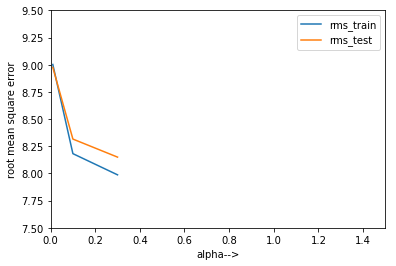

In [155]:
plt.plot(df_exp1.alpha,df_exp1.rms_train)
plt.plot(df_exp1.alpha,df_exp1.rms_test)
plt.axis([0, 1.5, 7.5, 9.5])
plt.xlabel("alpha-->")
plt.ylabel("root mean square error")
plt.legend()
plt.show()

In [156]:
#saving the value of cost function at each step
costs = list()
#regularised gradient descent with lambda user-provided
def gradient_descent(alpha, x, y, numIterations, lmbda):
    m = x.shape[0] # number of samples
    x = np.c_[ np.ones(m), x]
    theta = np.ones(14)
    x_transpose = x.transpose()
    
    for iter in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        J = (np.sum(loss ** 2) / (2 * m)) + ((lmbda * np.sum(theta[1:]**2) )/ (2 * m)) 
        costs.append(J)
        gradient = np.dot(x_transpose, loss) / m   
        theta = theta - alpha * gradient 
        
    theta1 = theta
    y_train_pred = np.dot(x,theta1)
    # root mean square error
    rms_train = ((((y_train_pred - np.array(y))**2).sum())/m)**0.5
    #mean square error
    mse_train= ((((y_train_pred - np.array(y))**2).sum())/m)
    
    x1 = np.c_[ np.ones(X_test.shape[0]), X_test]
    y_test_pred = np.dot(x1,theta)
    
    
    mse_test = ((((y_test_pred - np.array(Y_test))**2).sum())/(x1.shape[0]))
    rms_test = ((((y_test_pred - np.array(Y_test))**2).sum())/(x1.shape[0]))**0.5 ## root mean square error
    xyz = (alpha,rms_train,rms_test,mse_train, mse_test)
    return xyz


In [157]:
df_exp1 = pd.DataFrame()
for alpha in (0.005, 0.05, 0.025,0.01,0.1,0.3):
    alpha,rms_train,rms_test, mse_train, mse_test=gradient_descent(alpha, X_train, Y_train, 10000,0.5)
    dict={"alpha" : [alpha],"rms_train" :[rms_train] ,"rms_test":[rms_test], "mse_train": [mse_train],"mse_test": [mse_test]}
    df1=pd.DataFrame(data = dict)
    df_exp1 = df_exp1.append(df1,ignore_index = True)

In [158]:
df_exp1

,alpha,mse_test,mse_train,rms_test,rms_train
0,0.005,77.578092,77.220808,8.807843,8.787537
1,0.050,67.910784,65.508855,8.240800,8.093754
2,0.025,69.627755,67.503205,8.344325,8.216033
3,0.010,73.370127,72.059435,8.565636,8.488783
4,0.100,66.176285,63.500124,8.134881,7.968697
5,0.300,64.796392,61.620763,8.049621,7.849889


In [159]:
costs

[57.67268884976196,
 57.66085288041409,
 57.64904365317506,
 57.637260695038435,
 57.62550354465843,
 57.61377175205882,
 57.602064878349076,
 57.59038249544779,
 57.578724185812696,
 57.56708954217774,
 57.55547816729649,
 57.5438896736921,
 57.53232368341342,
 57.52077982779725,
 57.5092577472365,
 57.49775709095421,
 57.486277516783105,
 57.474818690950734,
 57.46338028786992,
 57.45196198993453,
 57.44056348732023,
 57.42918447779032,
 57.41782466650632,
 57.40648376584339,
 57.39516149521026,
 57.38385758087376,
 57.37257175578762,
 57.36130375942561,
 57.35005333761885,
 57.3388202423972,
 57.327604231834485,
 57.31640506989781,
 57.3052225263004,
 57.29405637635825,
 57.28290640085037,
 57.271772385882464,
 57.26065412275397,
 57.249551407828505,
 57.23846404240759,
 57.22739183260735,
 57.21633458923846,
 57.205292127689,
 57.19426426781029,
 57.1832508338055,
 57.17225165412115,
 57.16126656134123,
 57.150295392083976,
 57.13933798690129,
 57.12839419018053,
 57.117463850049,


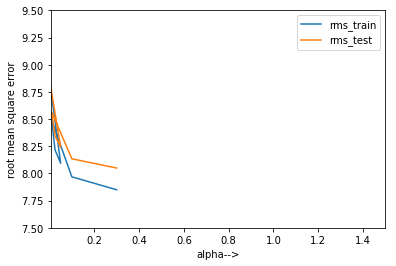

In [160]:
plt.plot(df_exp1.alpha,df_exp1.rms_train)
plt.plot(df_exp1.alpha,df_exp1.rms_test)
plt.axis([0.005, 1.5, 7.5, 9.5])
plt.xlabel("alpha-->")
plt.ylabel("root mean square error")
plt.legend()
plt.show()